In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from imblearn.metrics import *
from sklearn.impute import *

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [453]:
df= pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [454]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

- There are no missing data

In [455]:
df['mainroad'] = df['mainroad'].map({'yes':1,'no':0})

In [456]:
df['guestroom'] = df['guestroom'].map({'yes':1,'no':0})
df['basement'] = df['basement'].map({'yes':1,'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1,'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1,'no':0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':1,'unfurnished':0,'semi-furnished':2})

In [457]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [458]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.190086
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.081367
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.097834
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.089418
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.043288
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.079403
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.057513
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.093425
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.069076
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.020887


<Axes: >

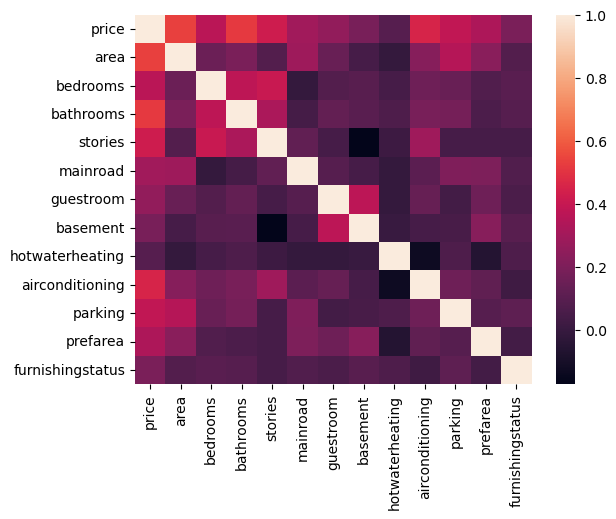

In [459]:
sns.heatmap(df.corr())

- Here price has the least correlation with hotwaterheating and basement
- So these features will be removed

In [460]:
df = df.drop(['hotwaterheating'],axis=1)
df = df.drop(['basement'],axis=1)

In [461]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,1


In [462]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [463]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


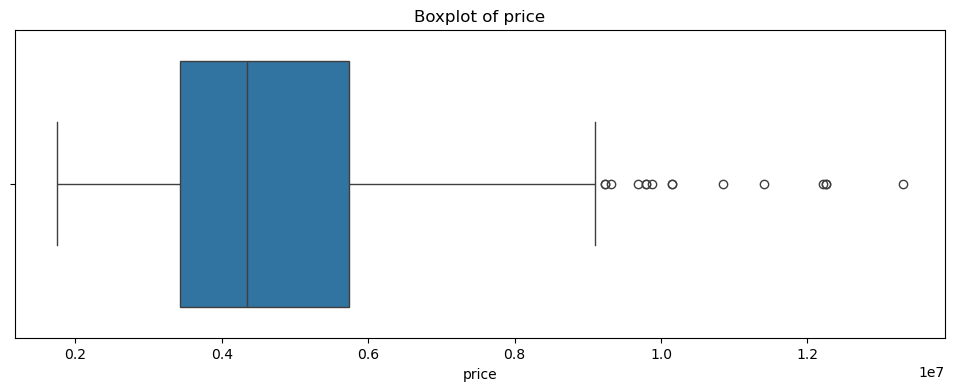

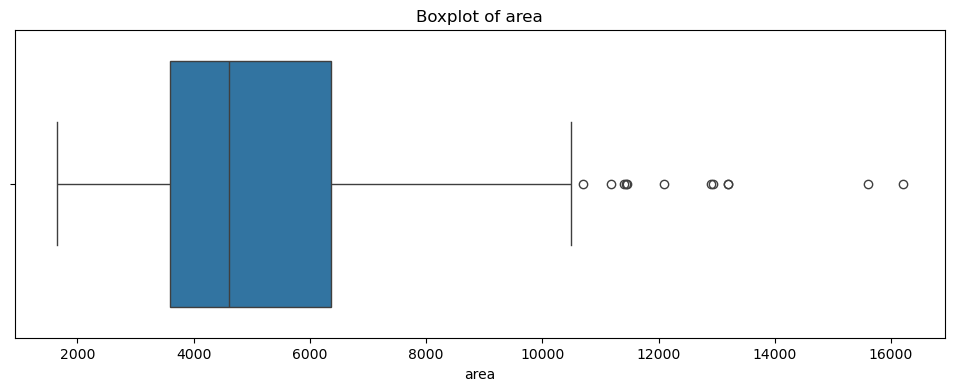

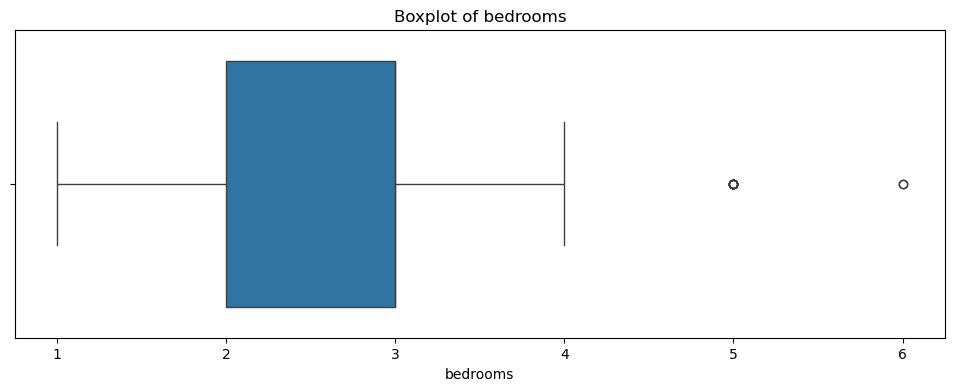

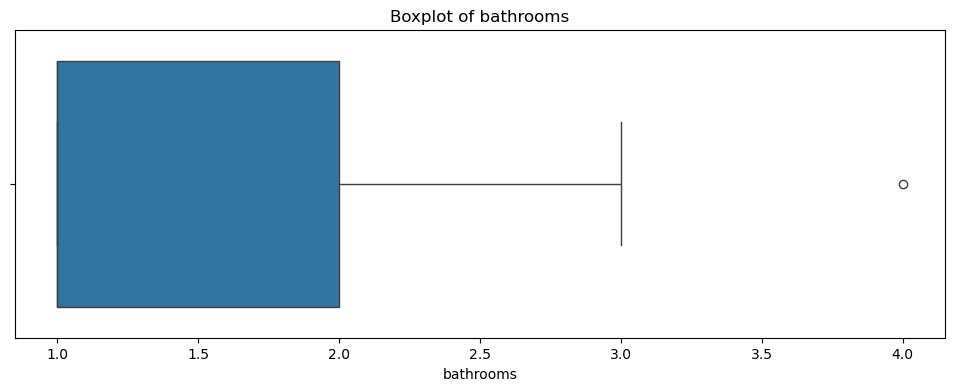

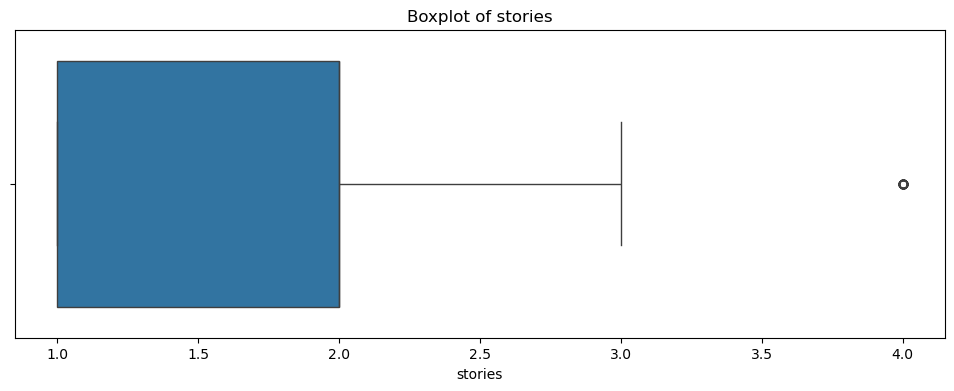

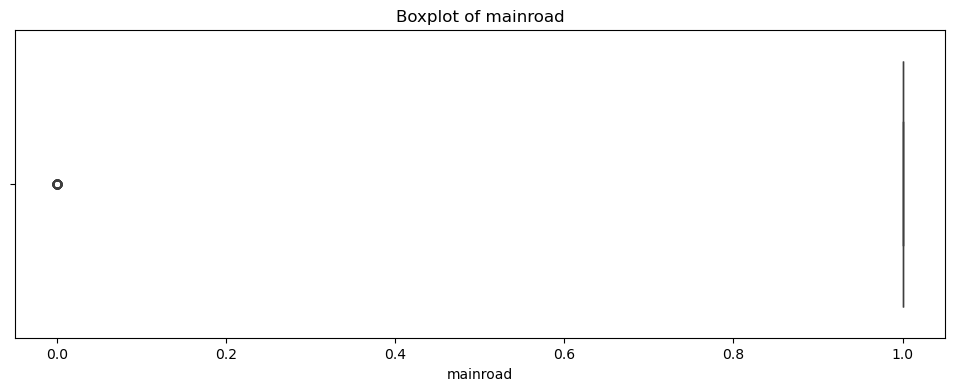

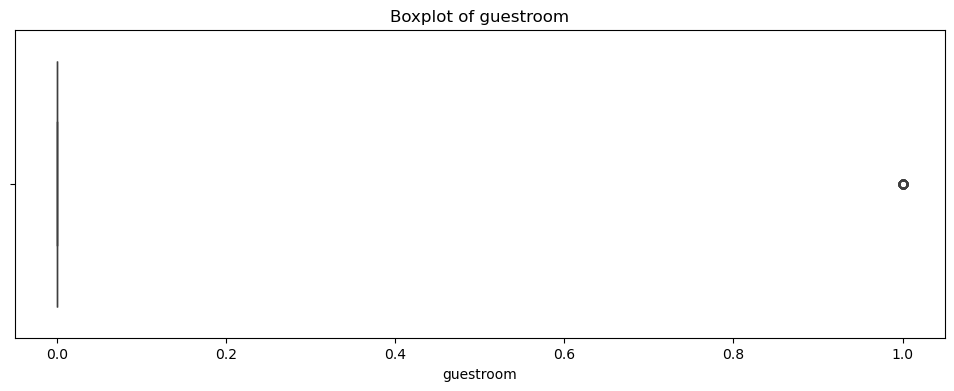

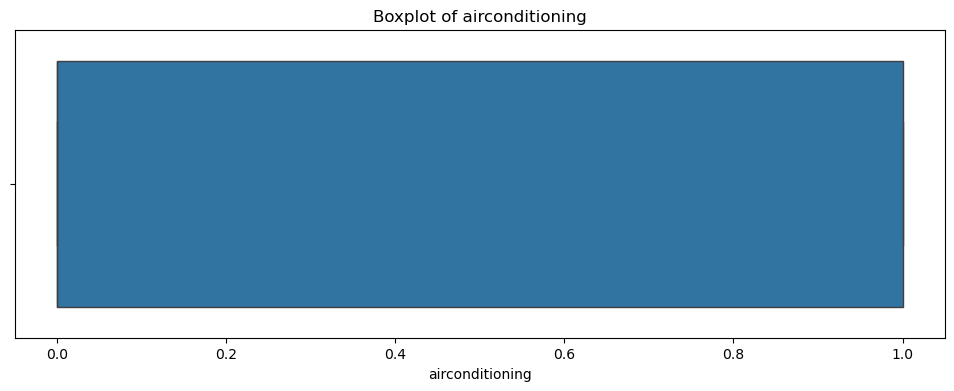

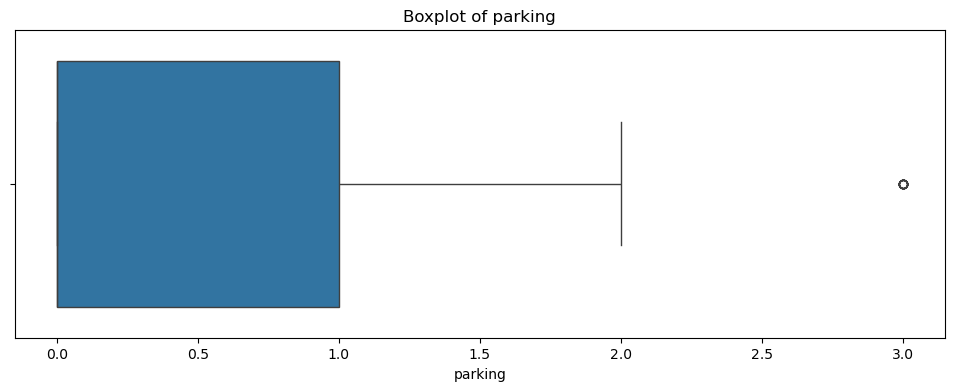

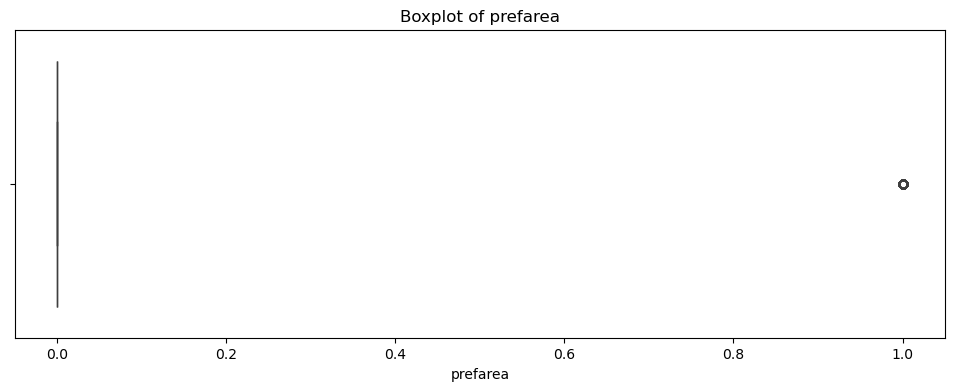

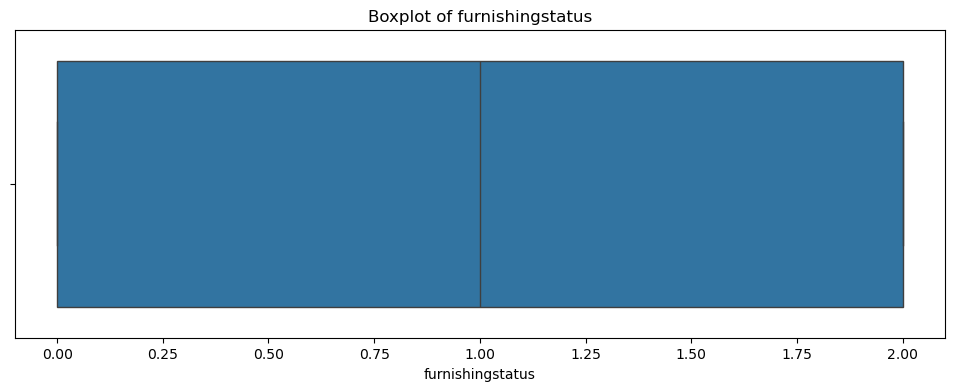

In [464]:
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [465]:
numerical_cols = df.select_dtypes(include=['number'])

skewness_values = numerical_cols.skew()

print("Skewness of numerical columns:\n")
print(skewness_values)

Skewness of numerical columns:

price               1.212239
area                1.321188
bedrooms            0.495684
bathrooms           1.589264
stories             1.082088
mainroad           -2.065410
guestroom           1.688419
airconditioning     0.795748
parking             0.842062
prefarea            1.254361
furnishingstatus   -0.173566
dtype: float64


- These are the skewness of the plot
- mainroad has the highest skewness
- so we need to remove the outliers

In [466]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [467]:
numerical_cols = df.select_dtypes(include=['number'])

skewness_values = numerical_cols.skew()

print("Skewness of numerical columns:\n")
print(skewness_values)

Skewness of numerical columns:

price               1.212239
area                1.321188
bedrooms            0.495684
bathrooms           1.589264
stories             1.082088
mainroad           -2.065410
guestroom           1.688419
airconditioning     0.795748
parking             0.842062
prefarea            1.254361
furnishingstatus   -0.173566
dtype: float64


- Here the area columns skewness is reduced

In [468]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,1


In [469]:
sc= StandardScaler()

# Feature Engineering

In [470]:
df["price_per_sqft"] = df["price"] / df["area"]
df["bed_bath_ratio"] = df["bedrooms"] / (df["bathrooms"] + 1)  
df["room_density"] = (df["bedrooms"] + df["bathrooms"]) / df["area"]
df["stories_per_sqft"] = df["stories"] / df["area"]
df["parking_price_interaction"] = df["parking"] * df["price_per_sqft"]
df["area_bathroom_interaction"] = df["area"] * df["bathrooms"]

In [471]:
Q1 = df["area"].quantile(0.25)
Q3 = df["area"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["area"] >= lower_bound) & (df["area"] <= upper_bound)]


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


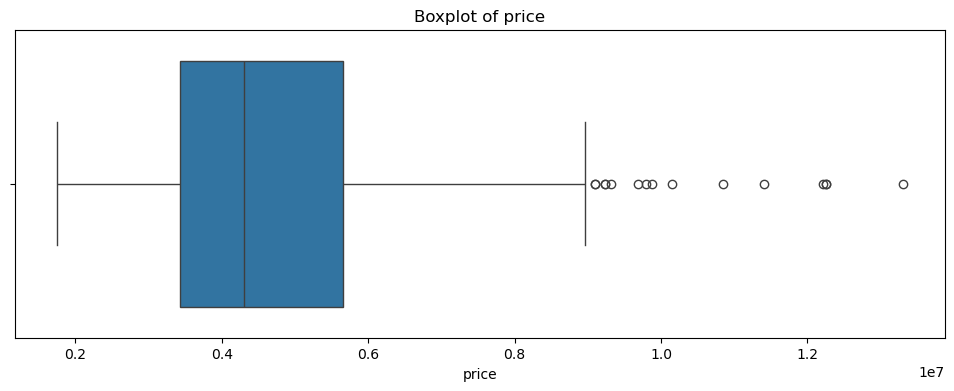

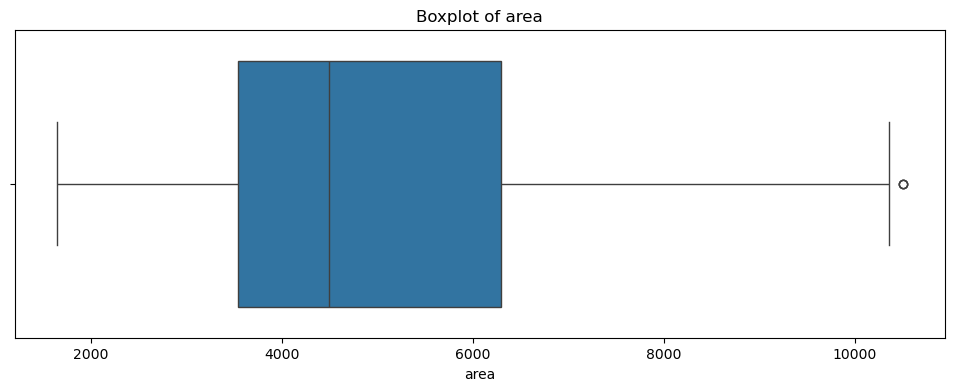

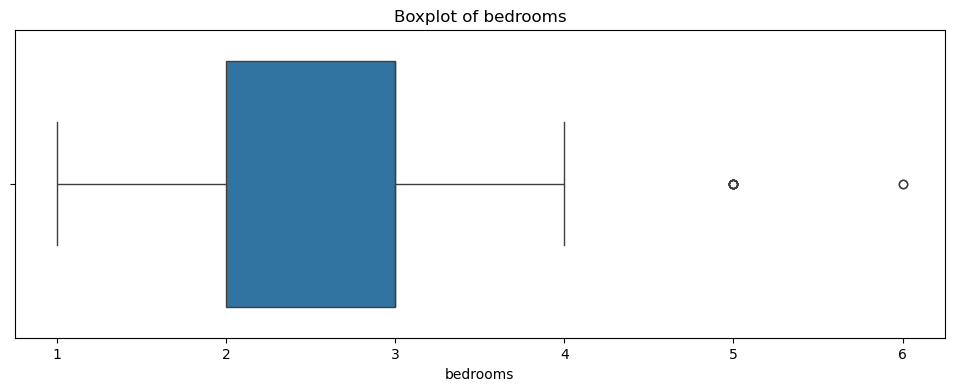

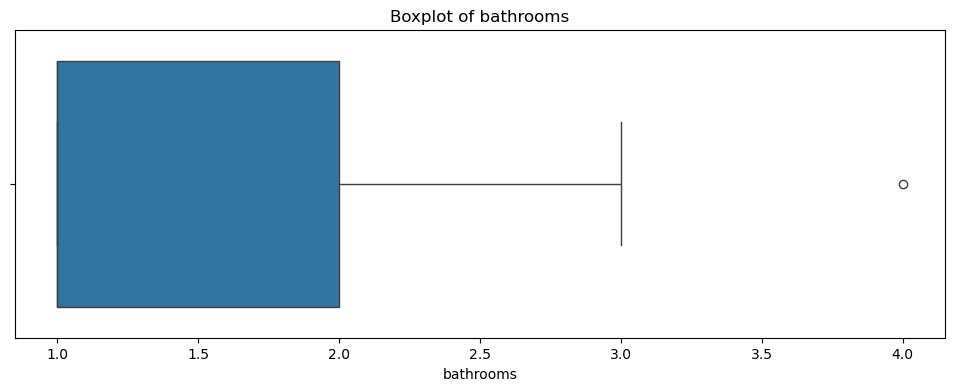

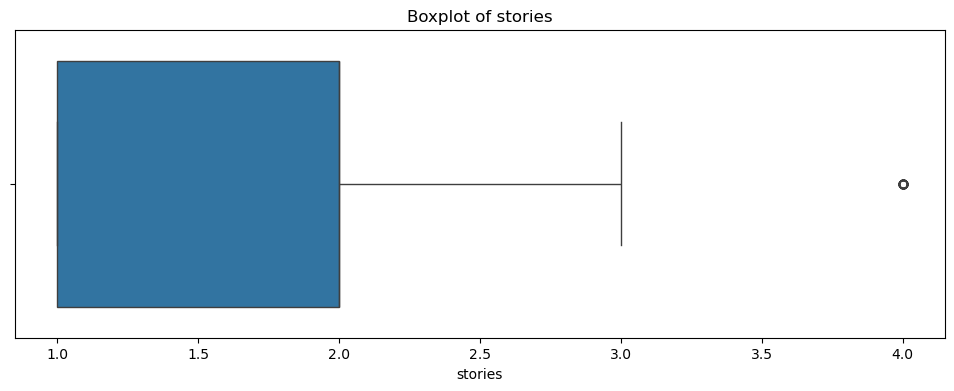

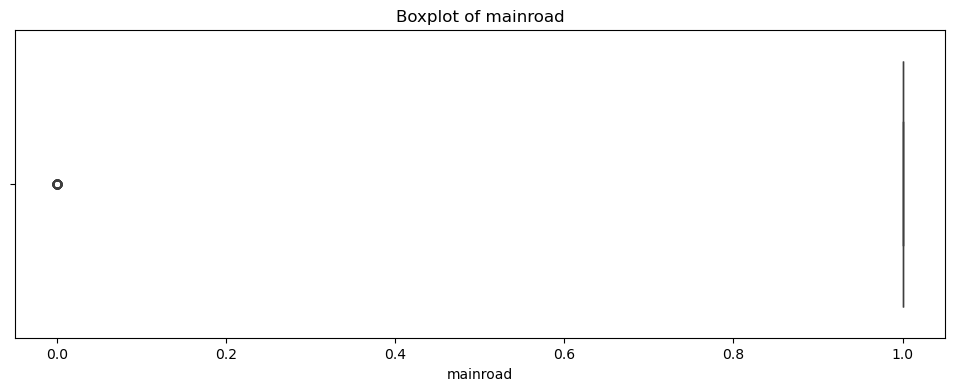

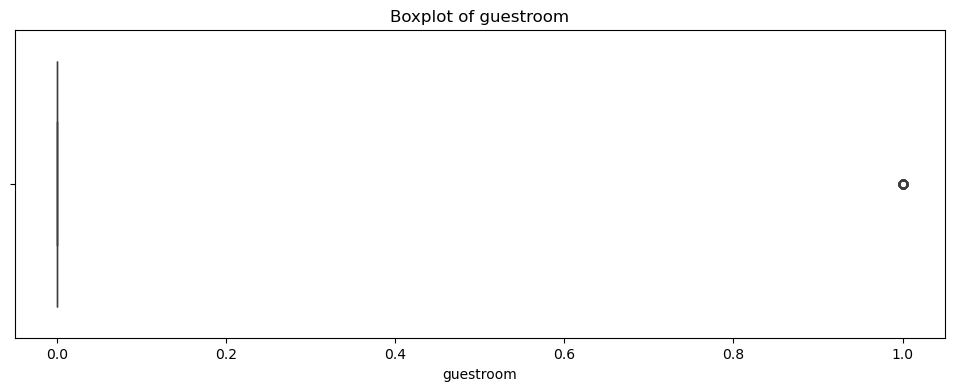

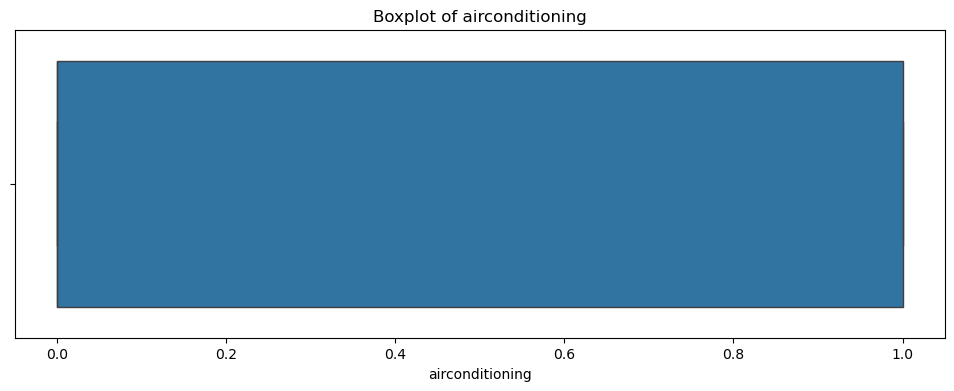

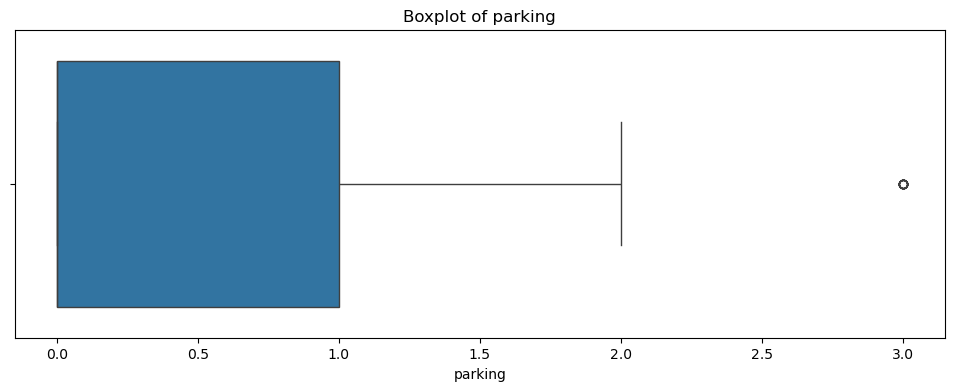

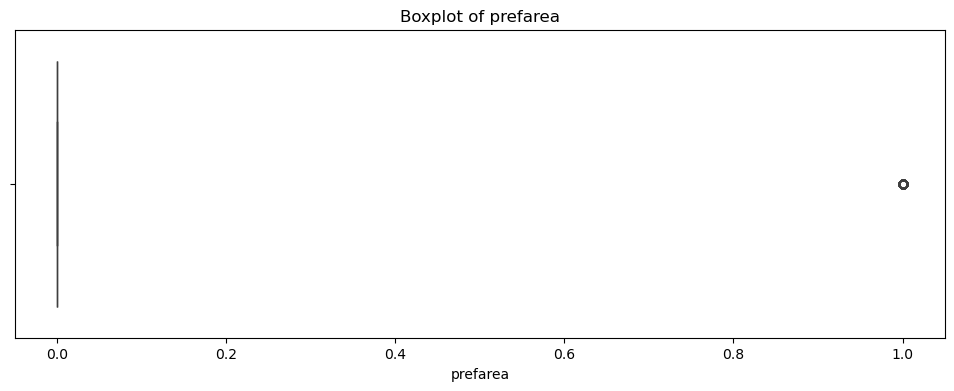

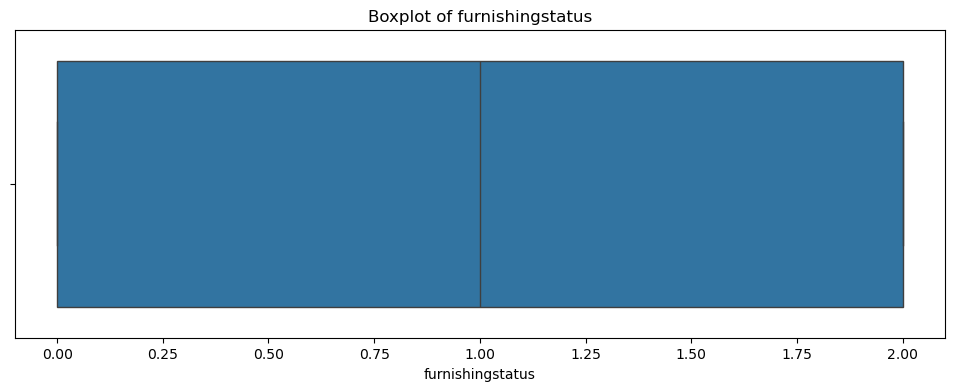

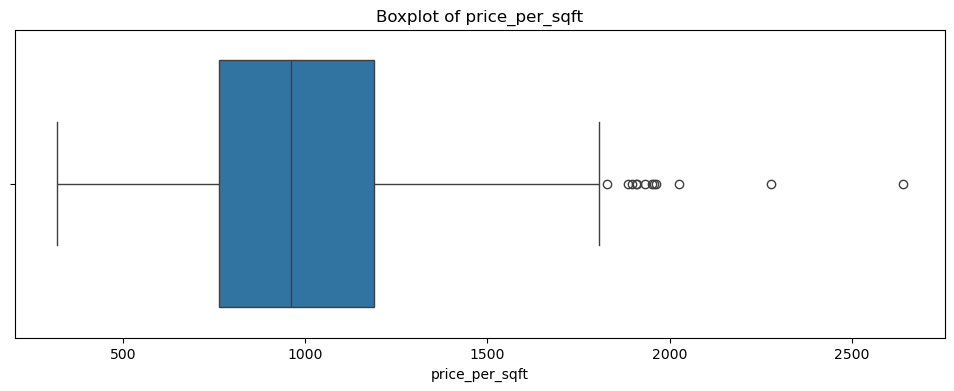

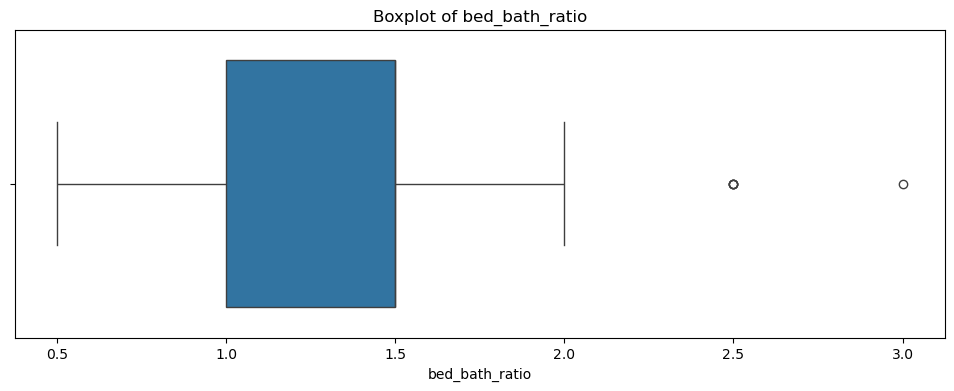

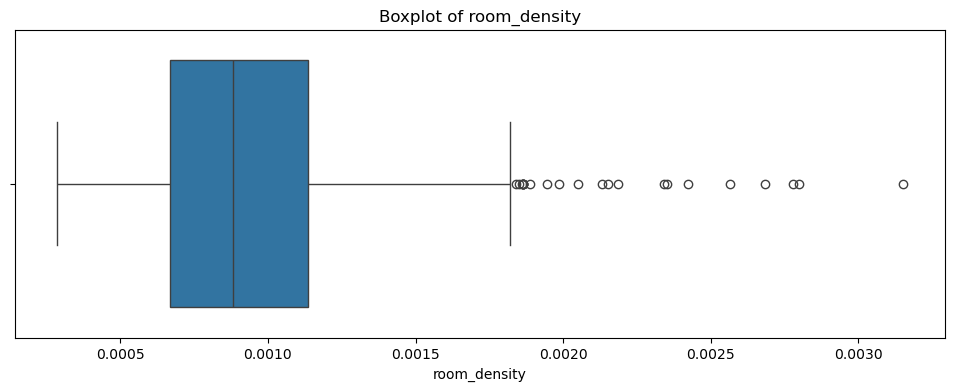

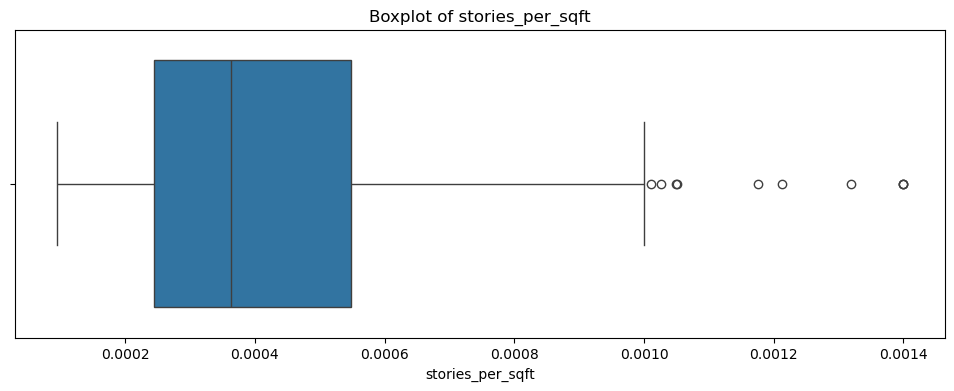

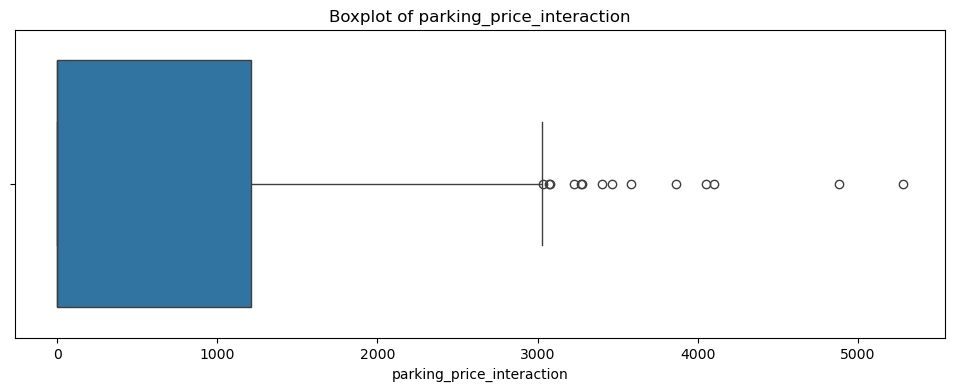

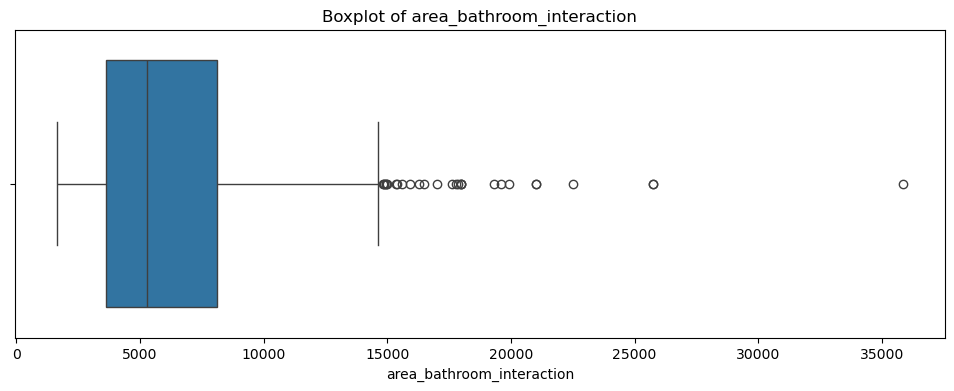

In [472]:
numeric_columns_2 = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

for column in numeric_columns_2:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [473]:
numerical_cols = df.select_dtypes(include=['number'])

skewness_values = numerical_cols.skew()

print("Skewness of numerical columns:\n")
print(skewness_values)

Skewness of numerical columns:

price                        1.244791
area                         0.683497
bedrooms                     0.487915
bathrooms                    1.565185
stories                      1.081360
mainroad                    -2.028319
guestroom                    1.669564
airconditioning              0.788434
parking                      0.868617
prefarea                     1.294261
furnishingstatus            -0.170614
price_per_sqft               0.845649
bed_bath_ratio               0.683629
room_density                 1.526018
stories_per_sqft             1.162014
parking_price_interaction    1.415984
area_bathroom_interaction    1.977831
dtype: float64


In [474]:
Q1 = df["room_density"].quantile(0.25)
Q3 = df["room_density"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["room_density"] >= lower_bound) & (df["room_density"] <= upper_bound)]

In [476]:
Q1 = df["area_bathroom_interaction"].quantile(0.25)
Q3 = df["area_bathroom_interaction"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["area_bathroom_interaction"] >= lower_bound) & (df["area_bathroom_interaction"] <= upper_bound)]

In [477]:
Q1 = df["parking_price_interaction"].quantile(0.25)
Q3 = df["parking_price_interaction"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["parking_price_interaction"] >= lower_bound) & (df["parking_price_interaction"] <= upper_bound)]

In [478]:
numerical_cols = df.select_dtypes(include=['number'])

skewness_values = numerical_cols.skew()

print("Skewness of numerical columns:\n")
print(skewness_values)

Skewness of numerical columns:

price                        0.817129
area                         0.727673
bedrooms                     0.272940
bathrooms                    1.568633
stories                      1.152042
mainroad                    -2.069006
guestroom                    1.680478
airconditioning              0.795107
parking                      0.971620
prefarea                     1.348731
furnishingstatus            -0.151806
price_per_sqft               0.534557
bed_bath_ratio               0.477995
room_density                 0.577732
stories_per_sqft             0.768262
parking_price_interaction    1.038805
area_bathroom_interaction    1.072616
dtype: float64


In [479]:
y = df['price']
x = df.drop(['price'],axis=1)

# Training

In [480]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [481]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,bed_bath_ratio,room_density,stories_per_sqft,parking_price_interaction,area_bathroom_interaction
167,4600,2,2,1,1,0,1,2,0,2,1148.913043,0.666667,0.000870,0.000217,2297.826087,9200
242,3640,3,1,2,1,0,1,0,0,1,1250.000000,1.500000,0.001099,0.000549,0.000000,3640
524,3264,2,1,1,1,0,0,0,0,0,729.166667,1.000000,0.000919,0.000306,0.000000,3264
323,5400,3,1,1,1,0,0,3,0,2,745.370370,1.500000,0.000741,0.000185,2236.111111,5400
331,7260,3,2,1,1,1,0,3,0,1,539.944904,1.000000,0.000689,0.000138,1619.834711,14520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3480,4,1,2,0,0,0,1,0,2,945.402299,2.000000,0.001437,0.000575,945.402299,3480
377,2850,3,2,2,0,0,0,0,1,0,1277.192982,1.000000,0.001754,0.000702,0.000000,5700
34,6840,5,1,2,1,1,1,1,0,1,1187.134503,2.500000,0.000877,0.000292,1187.134503,6840
166,7800,3,1,1,1,0,1,2,1,0,682.051282,1.500000,0.000513,0.000128,1364.102564,7800


In [482]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,bed_bath_ratio,room_density,stories_per_sqft,parking_price_interaction,area_bathroom_interaction
128,5500,3,1,3,1,1,1,1,0,1,1067.818182,1.500000,0.000727,0.000545,1067.818182,5500
136,5400,4,2,2,1,0,1,2,0,0,1062.962963,1.333333,0.001111,0.000370,2125.925926,10800
360,4040,2,1,1,1,0,0,0,0,2,918.316832,1.000000,0.000743,0.000248,0.000000,4040
374,3520,2,2,1,1,0,0,0,0,2,1034.090909,0.666667,0.001136,0.000284,0.000000,7040
276,4400,2,1,1,1,0,0,1,0,2,978.409091,1.000000,0.000682,0.000227,978.409091,4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,3300,3,3,2,1,0,0,0,0,2,1675.757576,0.750000,0.001818,0.000606,0.000000,9900
46,6000,3,2,4,1,0,1,1,0,1,1254.166667,1.000000,0.000833,0.000667,1254.166667,12000
146,10500,2,1,1,1,0,0,1,0,2,533.333333,1.000000,0.000286,0.000095,533.333333,10500
260,3162,3,1,2,1,0,1,1,0,1,1414.611006,1.500000,0.001265,0.000633,1414.611006,3162


In [483]:
column_names= x.columns.values
column_names

array(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price_per_sqft', 'bed_bath_ratio',
       'room_density', 'stories_per_sqft', 'parking_price_interaction',
       'area_bathroom_interaction'], dtype=object)

In [484]:
x_train_sc= sc.fit_transform(x_train)

In [485]:
x_test_sc= sc.transform(x_test)

In [486]:
x_train_2= pd.DataFrame(x_train_sc, columns=column_names)

In [487]:
x_test_2= pd.DataFrame(x_test_sc, columns=column_names)

In [488]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [489]:
lr.fit(x_train_2, y_train)
print('training:', lr.score(x_train_2, y_train))
print('testing:', lr.score(x_test_2, y_test))

training: 0.9651465988711807
testing: 0.9359225074044666


In [491]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(x_test_2)

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


R-squared (R²): 0.9359225074044666


# Visualization

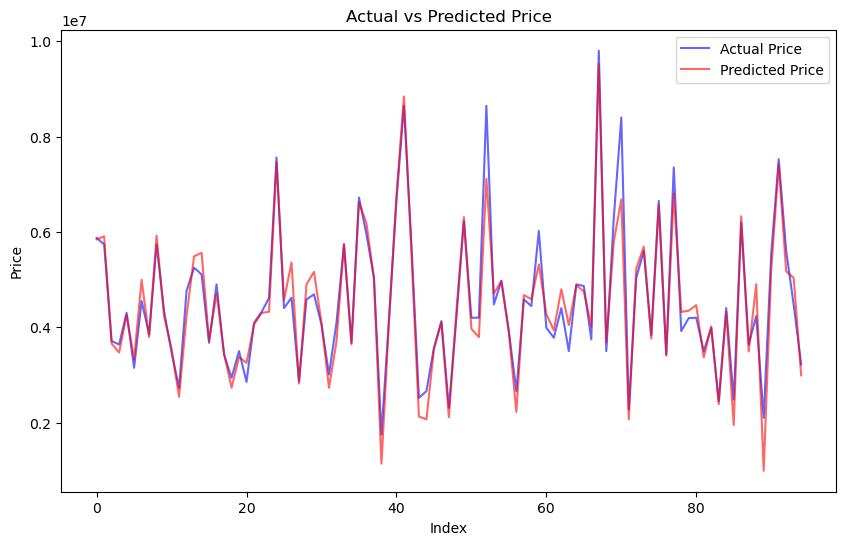

In [499]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price', alpha=0.6)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Price', alpha=0.6)
plt.title('Actual vs Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()


- This plot is basically the actual data vs predicted data
- We can see that they are almost same

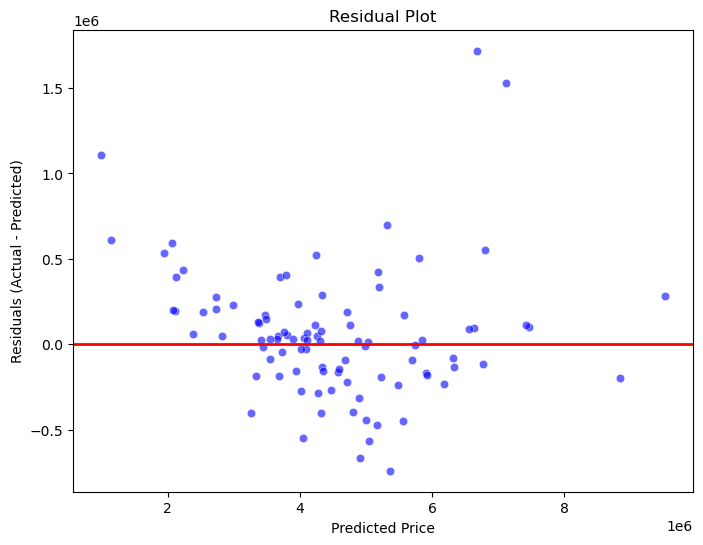

In [502]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', lw=2)  # Line at 0 for reference
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()
